# ====== NEURAL NETWORK ======


# Graph

In [2]:
import numpy as np
import tensorflow as tf

In [8]:
np.random.seed(101)
tf.set_random_seed(101)

In [13]:
rand_a= np.random.uniform(0, 100, (5, 5))
rand_a

array([[68.06777682, 52.15481923,  4.33966944, 22.39366035, 57.52050869],
       [12.04336601, 50.01167138, 13.80095683,  5.28084011, 17.82769225],
       [44.23681315, 87.75873246, 94.9264129 , 47.81674168, 46.11193423],
       [63.7289031 , 32.46079964, 11.7578093 ,  5.11009964, 63.76586528],
       [81.22658949, 67.02604203, 65.17677035, 42.45689436, 65.65953362]])

In [14]:
rand_b = np.random.uniform(0, 100, (5, 1))

In [15]:
rand_b

array([[20.91614989],
       [65.99245189],
       [52.96233988],
       [74.85203699],
       [ 9.37568559]])

In [16]:
a = tf.placeholder(tf.float32)

In [17]:
b = tf.placeholder(tf.float32)

In [18]:
add_op = a + b

In [19]:
mul_op = a * b

In [29]:
with tf.Session() as sess:
    #add_result = sess.run(add_op,feed_dict={a:10,b:20})
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})  # Mengambil angka dari rand_a dan rand_b dan ditambahkan sehingga mendapatkan hasil penjumlahan
    print(add_result)
    
    mul_result = sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})  # Mengambil angka dari rand_a dan rand_b dan dikalikan sehingga mendapatkan hasil perkalian
    print(mul_result)

[[ 88.98393   73.07097   25.255817  43.309807  78.43666 ]
 [ 78.03582  116.00413   79.79341   71.27329   83.820145]
 [ 97.19916  140.72107  147.88876  100.77908   99.07428 ]
 [138.58093  107.312836  86.60985   79.962135 138.6179  ]
 [ 90.60228   76.401726  74.55246   51.83258   75.03522 ]]
[[1423.7158   1090.8779     90.769165  468.38913  1203.1075  ]
 [ 794.7713   3300.393     910.75903   348.49557  1176.4932  ]
 [2342.8853   4647.908    5027.5254   2532.4866   2442.196   ]
 [4770.2383   2429.757     880.096     382.50137  4773.005   ]
 [ 761.555     628.4151    611.07697   398.0625    615.60315 ]]


# Example Neural Network

In [30]:
n_features= 10

In [31]:
n_dense_neurons = 3

In [32]:
x = tf.placeholder(tf.float32,(None,n_features))

In [35]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

In [36]:
xW = tf.matmul(x,W)

In [37]:
z = tf.add(xW,b)

In [38]:
a = tf.sigmoid(z)

In [39]:
init = tf.global_variables_initializer()

In [43]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [44]:
print(layer_out)

[[0.31032524 0.850404   0.7836516 ]]


# Simple Regression Example 

In [45]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [46]:
x_data

array([-1.25968938,  1.43275993,  2.61476233,  2.96715913,  2.98416748,
        6.58221379,  6.3214799 ,  7.93277531,  9.52050331, 10.52583655])

In [47]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [48]:
y_label

array([ 0.58369399,  0.63848141,  1.95939391,  2.55270623,  5.85095237,
        4.92122658,  5.6086015 ,  6.6657991 , 10.22105704,  9.55430279])

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

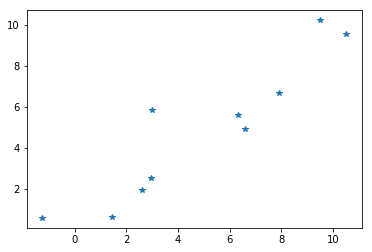

In [50]:
plt.plot(x_data,y_label,'*')

y = mx + b

In [52]:
np.random.rand(2)

array([0.73356761, 0.91388953])

In [54]:
m = tf.Variable(0.44)
b = tf.Variable(0.91)     # nilai ini diambil dari np.random.rand(2)

In [58]:
error = 0

for x,y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

In [62]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [63]:
init = tf.global_variables_initializer()

In [71]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100
    for i in range(training_steps):
        sess.run(train)
    final_slope, final_intercept = sess.run([m,b])

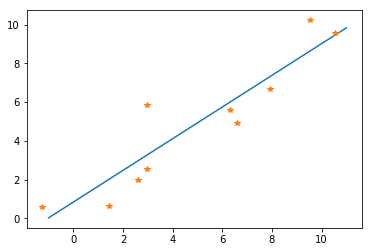

In [72]:
x_test = np.linspace(-1,11,10)

# y = mx + b
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred_plot)
plt.plot(x_data, y_label, '*')